# Road Following - Live demo

In this notebook, we will use model we trained to move jetBot smoothly on track.

In [1]:
pip install torch

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\82109\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\82109\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\82109\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Load Trained Model

In [4]:
import torch
import torch.nn as nn
from torchvision import models
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import glob
import PIL.Image
import os
import numpy as np

In [5]:
# Initialize the model architecture
model = models.resnet18(pretrained=False)
model.fc = nn.Linear(512, 1)

# Load the trained model from the checkpoint file and map it to the CPU
checkpoint = torch.load('checkpoint.pth', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint)


# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

C:\Users\82109\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\82109\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


## set test dataset

Sample 1 - Image Shape: torch.Size([3, 224, 224]), x: -2.3333332538604736
Sample 2 - Image Shape: torch.Size([3, 224, 224]), x: 0.6833333373069763
Sample 3 - Image Shape: torch.Size([3, 224, 224]), x: 0.7833333611488342
Sample 4 - Image Shape: torch.Size([3, 224, 224]), x: 4.75
Sample 5 - Image Shape: torch.Size([3, 224, 224]), x: -2.3499999046325684


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


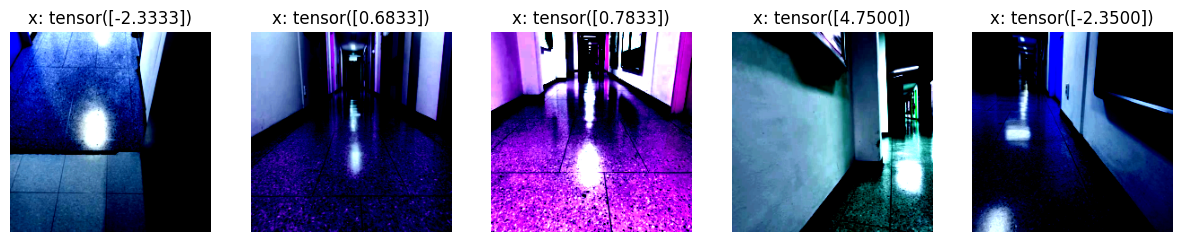

In [6]:
import matplotlib.pyplot as plt

def get_x(file_name):
    """Gets the x value from the image filename"""
    token = file_name.split("-")
    #print(token[0], token[1])
    return (float(int(token[1].split(".")[0]) - 300.0) * 5 / 300.0)

class testDataset(torch.utils.data.Dataset):

    def __init__(self, directory):
        self.directory = directory
        self.image_paths = glob.glob(os.path.join(self.directory, '*.jpg'))
        self.color_jitter = transforms.ColorJitter(0.3, 0.3, 0.3, 0.3)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]

        image = PIL.Image.open(image_path)
        x = float(get_x(os.path.basename(image_path)))

        # if float(np.random.rand(1)) > 0.5:
        #     image = transforms.functional.hflip(image)
        #     x = -x

        image = self.color_jitter(image)
        image = transforms.functional.resize(image, (224, 224))
        image = transforms.functional.to_tensor(image)
        image = image.numpy()[::-1].copy()
        image = torch.from_numpy(image)
        image = transforms.functional.normalize(image, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

        return image, torch.tensor([x]).float()

test_dataset = testDataset('test_dataset')

for i in range(5):
    image, x = test_dataset[i]
    print(f"Sample {i+1} - Image Shape: {image.shape}, x: {x.item()}")

# Visualize selected images with their predicted x values
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    image, x = test_dataset[i]
    image = image.permute(1, 2, 0).numpy()

    axes[i].imshow(image)
    axes[i].set_title(f'x: {x}')
    axes[i].axis('off')

plt.show()


In [7]:
test_loader = DataLoader(
    test_dataset,
    batch_size=16,
    shuffle=True,
    num_workers=0
)

## evaluate

Batch [1/13] - Test Loss: 3.3602
Batch [2/13] - Test Loss: 4.4993
Batch [3/13] - Test Loss: 3.9551
Batch [4/13] - Test Loss: 3.5429
Batch [5/13] - Test Loss: 8.1654
Batch [6/13] - Test Loss: 5.3045
Batch [7/13] - Test Loss: 4.5073
Batch [8/13] - Test Loss: 3.3230
Batch [9/13] - Test Loss: 3.3519
Batch [10/13] - Test Loss: 6.5501
Batch [11/13] - Test Loss: 4.7134
Batch [12/13] - Test Loss: 5.9620
Batch [13/13] - Test Loss: 3.7508
Test Loss: 4.6912


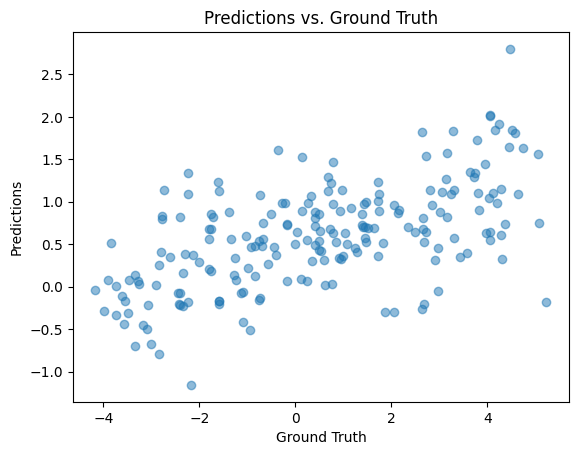

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


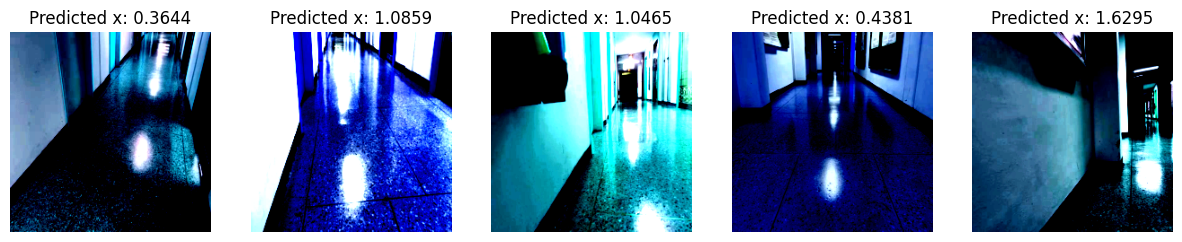

In [8]:
import matplotlib.pyplot as plt

# Ensure matplotlib is installed: pip install matplotlib

# Set the model to evaluation mode
model.eval()

# Initialize counters for debugging
total_test_batches = len(test_loader)
test_batch_count = 0
test_loss = 0.0

# Lists to store predictions and ground truth
all_predictions = []
all_labels = []

# Lists to store images and predicted x values for visualization
selected_images = []
predicted_x_values = []

# Evaluate the model on the test data
with torch.no_grad():
    for images, labels in iter(test_loader):
        images = images.to(device, non_blocking=True)
        labels = labels.to(device, non_blocking=True)
        outputs = model(images)
        loss = F.mse_loss(outputs, labels)
        test_loss += float(loss)

        # Store predictions and ground truth
        all_predictions.extend(outputs.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Store a subset of images and their predicted x values for visualization
        if len(selected_images) < 5:
            selected_images.extend(images.cpu())
            predicted_x_values.extend(outputs.cpu().numpy()[:, 0])

        # Print detailed testing information for each batch
        test_batch_count += 1
        print(f"Batch [{test_batch_count}/{total_test_batches}] - Test Loss: {loss:.4f}")

test_loss /= len(test_loader)

print(f'Test Loss: {test_loss:.4f}')

# Visualize predictions vs. ground truth
plt.scatter(all_labels, all_predictions, alpha=0.5)
plt.title('Predictions vs. Ground Truth')
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

# Visualize selected images with their predicted x values
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):
    image = selected_images[i].permute(1, 2, 0).numpy()
    predicted_x = predicted_x_values[i]

    axes[i].imshow(image)
    axes[i].set_title(f'Predicted x: {predicted_x:.4f}')
    axes[i].axis('off')

plt.show()


### Connecting Camera

In [9]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\82109\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [10]:
import cv2
import os
from PIL import Image

def take_photo(save_path, cnt):
    # Open the webcam
    cap = cv2.VideoCapture(1)  # 0 is the default camera

    # Capture a single frame
    ret, frame = cap.read()

    # Save the image
    filename = os.path.join(save_path, f"{cnt}.jpg")
    cv2.imwrite(filename, frame)

    # Release the webcam
    cap.release()

    # Convert the frame to a PIL Image
    pil_image = Image.fromarray(frame)

    return pil_image


In [11]:
!pip install pyserial
import serial
import time

def send(raw):
    data = None
    if raw <= -2.0:
        data = "1"
    elif raw <= -0.25:
        data = "2"
    elif raw <= 0.25:
        data = "3"
    elif raw <= 2.0:
        data = "4"
    else:
        data = "5"
    
    # if raw <= 0:
    #     data = "1"
    # else :
    #     data = "2"
        
    # Windows에서는 'COMx' 형식으로 포트를 지정 (x는 사용 중인 COM 포트 번호)
    ser = serial.Serial('COM8', 9600)
    time.sleep(2)
    ser.write(data.encode())
    # 시리얼 포트 닫기
    ser.close()


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\82109\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
import time
from PIL import Image

cnt = 1
try:
    while True:
        time.sleep(1)  # Sleep for 1 second
        image = take_photo(save_path="live", cnt=cnt)

        # image_path = glob.glob(os.path.join("live", str(cnt)+'.jpg'))
        color_jitter = transforms.ColorJitter(0.3, 0.3, 0.3, 0.3)

        time.sleep(3)  # Sleep for 1 second

        # image = PIL.Image.open(image_path)

        image = color_jitter(image)
        image = transforms.functional.resize(image, (224, 224))
        image = transforms.functional.to_tensor(image)
        image = image.numpy()[::-1].copy()
        image = torch.from_numpy(image)
        image = transforms.functional.normalize(image, [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        image = image.unsqueeze(0)
        # Set the model to evaluation mode
        model.eval()

        # Evaluate the model on the test data
        with torch.no_grad():
            output = model(image)
            send(output)
            print(output.cpu().numpy())

        # print(capture_image)

        cnt = cnt + 1

except Exception as err:
    # Errors will be thrown if the user does not have a webcam or if they do not
    # grant the page permission to access it.
    print(str(err))

[[-0.64652723]]
[[-0.44793138]]


KeyboardInterrupt: 

In [ ]:
# Example usage to capture and save the image as a global variable
take_photo(save=True)
# Access the captured image data from the global variable
print(captured_image_data)

TypeError: take_photo() got an unexpected keyword argument 'save'

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

### Camera Setting